In [1]:
import pandas as pd
data = pd.read_csv('rbc_df.csv')
data

,date,comments,likes,text,url
0,10/11/2021 16:11:33,25,1812,Переговоры — это столкновение двух и более про...,https://www.instagram.com/p/CWGgCllIUjK/
1,10/11/2021 11:10:42,327,2338,"У белорусско-польской границы мигранты, в боль...",https://www.instagram.com/p/CWF9nA6opvy/
2,09/11/2021 16:52:42,83,4252,Большинство из нас слышали про необходимость п...,https://www.instagram.com/p/CWD_9EHIf_K/
3,09/11/2021 13:29:03,27,1500,"Покупка мужского костюма — интересный процесс,...",https://www.instagram.com/p/CWDophIN18s/
4,08/11/2021 15:45:42,44,2214,Предприниматели грядущих десятилетий будут отл...,https://www.instagram.com/p/CWBTfdnISbq/
...,...,...,...,...,...
2706,21/03/2016 14:14:22,0,6,Строительство космодрома Восточный. \n\nФото: ...,https://www.instagram.com/p/BDN9F0TFF9k/
2707,21/03/2016 14:13:27,0,21,Отдыхающие на набержной Ялты. \n\nФото: Катери...,https://www.instagram.com/p/BDN8_EPlF9S/
2708,21/03/2016 14:12:37,2,16,"Уничтожение санкционных продуктов, Подмосковье...",https://www.instagram.com/p/BDN84-lFF9C/
2709,21/03/2016 13:58:48,0,5,Лечебно-реабилитационный центр для пожилых люд...,https://www.instagram.com/p/BDN7TsklF47/


In [2]:
data.describe()

,comments,likes
count,2711.000000,2711.000000
mean,131.238657,2163.443379
std,203.748409,2728.772495
min,0.000000,4.000000
25%,14.000000,352.000000
50%,55.000000,1302.000000
75%,160.000000,2923.500000
max,2458.000000,24298.000000


# Слабые выбросы

In [4]:
IQR = data.likes.quantile(.75) - data.likes.quantile(.25)
IQR

2571.5

In [6]:
weak_outliers_iqr = IQR * 1.5
weak_outliers_iqr

3857.25

In [7]:
left_margin = data.likes.quantile(.25) - weak_outliers_iqr
right_margin = data.likes.quantile(.75) + weak_outliers_iqr
print(left_margin, right_margin)

-3505.25 6780.75


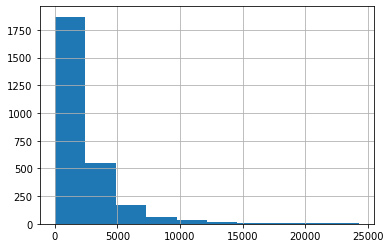

In [9]:
data.likes.hist();

In [17]:
data[data['likes'] > 6781].shape[0] #логическая маска (фильтр)

155

In [22]:
round(155/data.shape[0], 2) #процент слабых выбросов 

0.06

In [23]:
round(54/data.shape[0], 2) #процент сильных выбросов 

0.02

In [13]:
data['likes']

0       1812
1       2338
2       4252
3       1500
4       2214
        ... 
2706       6
2707      21
2708      16
2709       5
2710      22
Name: likes, Length: 2711, dtype: int64

# Сильные выбросы

In [18]:
strong_outliers_iqr = IQR * 3
strong_outliers_iqr

7714.5

In [19]:
right_margin = data.likes.quantile(.75) + strong_outliers_iqr
right_margin

10638.0

In [20]:
data[data['likes'] > 10638.0].shape[0] #логическая маска (фильтр)

54

In [28]:
type(data.head(3))

pandas.core.frame.DataFrame

In [27]:
type(data['likes']) #ряд значений

pandas.core.series.Series

In [32]:
data[(data['likes'] > 100) & (data['comments'] < 10)]

,date,comments,likes,text,url
480,27/05/2021 14:47:42,8,346,ЧЭЗ Next - ежедневный информационный марафон в...,https://www.instagram.com/p/CPYVoBoIVPV/
516,20/05/2021 14:39:33,3,359,ЧЭЗ Next - ежедневный информационный марафон в...,https://www.instagram.com/p/CPGTINVoY35/
541,13/05/2021 14:34:40,7,320,ЧЭЗ Next - ежедневный информационный марафон в...,https://www.instagram.com/p/CO0RCliIW4K/
590,29/04/2021 14:37:16,6,278,ЧЭЗ Next - ежедневный информационный марафон в...,https://www.instagram.com/p/COQOM6moI0H/
611,22/04/2021 17:33:02,7,299,ЧЭЗ Next - ежедневный информационный марафон в...,https://www.instagram.com/p/CN-gwxnImfJ/
...,...,...,...,...,...
2609,08/12/2017 14:45:50,9,112,"Вспомним, как это было. \n#рбк #rbc #rbcnews #...",https://www.instagram.com/p/BccfG2sjTte/
2621,29/11/2017 16:03:07,6,113,Конкурс «Мисс Америка» удивил мир. В 2017 году...,https://www.instagram.com/p/BcFczBZjsRL/
2628,23/11/2017 18:57:00,4,126,"Илон Маск поспорил, что его компания за 100 дн...",https://www.instagram.com/p/Bb2TwWej_D4/
2629,22/11/2017 15:24:18,2,118,"""Там, где кончается человеческий голос речи, ч...",https://www.instagram.com/p/BbzWylXj_0n/


In [40]:
import numpy as np #numperical python
lst = (1,3,6,7)
print(np.mean(lst), np.std(lst))

4.25 2.384848003542364


In [34]:
round(data.likes.std(), 2) #standard deviation

2728.77

In [36]:
from scipy import stats
round(stats.pearsonr(data.comments, data.likes)[0], 2) #подсчет корреляции

0.61

In [ ]:
https://www.kommersant.ru/search/results?search_query=%22синхронное+плавание%22+Россия&sort_type=1&search_full=1&time_range=2&dateStart=2020-11-16&dateEnd=2021-11-16

# Лемматизация (нормальная форма)

корреспондентов --> корреспондент
спродюссировали --> продюссировать

# Стемминг (основа слова)

спродюссировали --> продюссир

In [ ]:
'продюссер' in data_project['text']